In [ ]:
from pymongo import MongoClient 
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

Import cleaned csv (duplicate "state_code.1" columns must be dropped in order to avoid conflict) to MONGO db by running the following command in your terminal:

mongoimport --type csv -d startups -c startup_data --headerline --drop /Users/rexpeters/Desktop/project3/startup_data_cleaned.csv

In [5]:
mongo = MongoClient(port=27017) 

In [6]:
print(mongo.list_database_names()) 

['admin', 'config', 'local', 'startups', 'uk_food']


In [7]:
db = mongo['startups']

In [8]:
print(db.list_collection_names()) 

['startup_data']


In [9]:
startup_data = db['startup_data']

In [7]:
startup_data.find_one()

{'_id': ObjectId('673fd06d8401e92197c3ffa4'),
 'Unnamed: 0': 1005,
 'state_code': 'CA',
 'latitude': 42.35888,
 'longitude': -71.05682,
 'zip_code': 92101,
 'id': 'c:6669',
 'city': 'San Diego',
 'Unnamed: 6': '',
 'name': 'Bandsintown',
 'labels': 1,
 'founded_at': '1/1/2007',
 'closed_at': '',
 'first_funding_at': '4/1/2009',
 'last_funding_at': '1/1/2010',
 'age_first_funding_year': 2.2493,
 'age_last_funding_year': 3.0027,
 'age_first_milestone_year': 4.6685,
 'age_last_milestone_year': 6.7041,
 'relationships': 3,
 'funding_rounds': 3,
 'funding_total_usd': 375000,
 'milestones': 3,
 'is_CA': 1,
 'is_NY': 0,
 'is_MA': 0,
 'is_TX': 0,
 'is_otherstate': 0,
 'category_code': 'music',
 'is_software': 0,
 'is_web': 0,
 'is_mobile': 0,
 'is_enterprise': 0,
 'is_advertising': 0,
 'is_gamesvideo': 0,
 'is_ecommerce': 0,
 'is_biotech': 0,
 'is_consulting': 0,
 'is_othercategory': 1,
 'object_id': 'c:6669',
 'has_VC': 0,
 'has_angel': 1,
 'has_roundA': 0,
 'has_roundB': 0,
 'has_roundC': 0,

In [8]:
print(type(startup_data))
print(startup_data)

<class 'pymongo.collection.Collection'>
Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'startups'), 'startup_data')


In [9]:
data = list(startup_data.find())  # Convert MongoDB cursor to a list
dataframe = pd.DataFrame(data)

In [10]:
len(dataframe)

923

In [11]:
dataframe

,_id,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,673fd06d8401e92197c3ffa4,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,,Bandsintown,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,673fd06d8401e92197c3ffa5,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,,TriCipher,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,673fd06d8401e92197c3ffa6,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,673fd06d8401e92197c3ffa7,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
4,673fd06d8401e92197c3ffa8,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,673fd06d8401e92197c4033a,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,,CoTweet,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,673fd06d8401e92197c4033b,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,673fd06d8401e92197c4033c,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,,Paracor Medical,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,673fd06d8401e92197c4033d,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,,Causata,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


## Paige's Section

In [12]:
# Calculate percentage
status_percentage = dataframe['status'].value_counts(normalize=True) * 100

# Display the results
print(status_percentage)

status
acquired    64.68039
closed      35.31961
Name: proportion, dtype: float64


In [13]:
sort_acq = [
    {
        "$group": {
            "_id": "$category_code",
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }  # Count where status is "acquired"
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        } 
    },
    {
        "$sort": {"acquisition_rate": -1}
    }
]

# Execute query
try:
    result = startup_data.aggregate(sort_acq)

    # Print results
    for doc in result:
        print(doc)

except Exception as e:
    print(f"Error: {e}")

{'_id': 'sports', 'totalCount': 1, 'acquiredCount': 1, 'acquisition_rate': 1.0}
{'_id': 'hospitality', 'totalCount': 1, 'acquiredCount': 1, 'acquisition_rate': 1.0}
{'_id': 'health', 'totalCount': 3, 'acquiredCount': 3, 'acquisition_rate': 1.0}
{'_id': 'music', 'totalCount': 6, 'acquiredCount': 6, 'acquisition_rate': 1.0}
{'_id': 'transportation', 'totalCount': 2, 'acquiredCount': 2, 'acquisition_rate': 1.0}
{'_id': 'news', 'totalCount': 8, 'acquiredCount': 7, 'acquisition_rate': 0.875}
{'_id': 'travel', 'totalCount': 8, 'acquiredCount': 7, 'acquisition_rate': 0.875}
{'_id': 'analytics', 'totalCount': 19, 'acquiredCount': 16, 'acquisition_rate': 0.8421052631578947}
{'_id': 'security', 'totalCount': 19, 'acquiredCount': 15, 'acquisition_rate': 0.7894736842105263}
{'_id': 'enterprise', 'totalCount': 73, 'acquiredCount': 56, 'acquisition_rate': 0.7671232876712328}
{'_id': 'education', 'totalCount': 4, 'acquiredCount': 3, 'acquisition_rate': 0.75}
{'_id': 'advertising', 'totalCount': 62, '

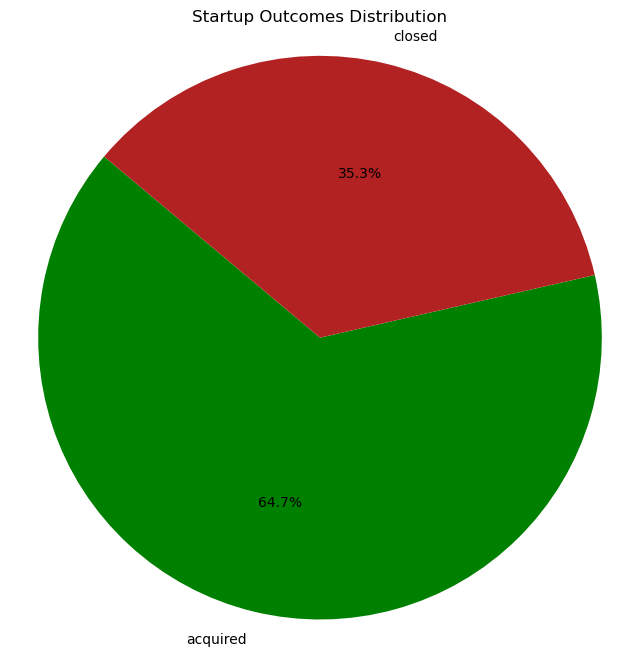

In [33]:
#Aggregate data for startup outcomes
outcomes = [
    {
        "$group": {
            "_id": "$status",  
            "count": {"$sum": 1} 
        }
    }
]

outcome_results = list(startup_data.aggregate(outcomes))
labels = [doc['_id'] for doc in outcome_results] 
sizes = [doc['count'] for doc in outcome_results] 
colors = ["green", "firebrick"]

#Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Startup Outcomes Distribution")
plt.axis('equal')  
plt.show()

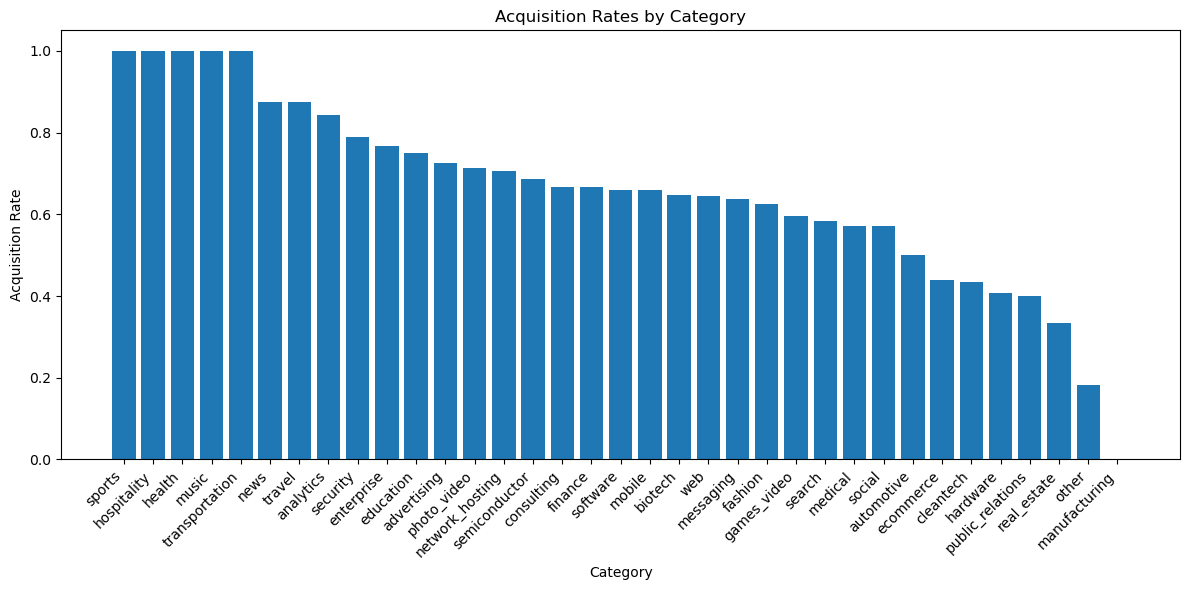

In [15]:
#Aggregate data for acquisition status
acq_rates = [
    {
        "$group": {
            "_id": "$category_code",
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }  # Count where status is "acquired"
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }  # Calculate 
    },
    {
        "$sort": {"acquisition_rate": -1}
    }
]

result = list(startup_data.aggregate(acq_rates))

categories = [doc['_id'] for doc in result] 
acquisition_rates = [doc['acquisition_rate'] for doc in result]

#Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(categories, acquisition_rates)
plt.xticks(rotation=45, ha='right') 
plt.title("Acquisition Rates by Category")
plt.xlabel("Category")
plt.ylabel("Acquisition Rate")
plt.tight_layout() 
plt.show()

In [ ]:
VC = [
    {
        "$project": {
            "category": "$category_code",
            "funding_stages": [
                {"stage": "VC", "present": "$has_VC"},

            ],
            "status": "$status"
        }
    },
    {
        "$unwind": "$funding_stages"  
    },
    {
        "$match": {"funding_stages.present": 1}  
    },
    {
        "$group": {
            "_id": {
                "category": "$category",
                "funding_stage": "$funding_stages.stage"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"_id.category": 1, "_id.funding_stage": 1}}
]
# Run 
result = list(startup_data.aggregate(VC))

# Convert to DataFrame
data = pd.DataFrame(result)

# Flatten the _id field into separate columns
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)

# Rename columns for clarity
data.rename(columns={"category": "Startup Category", "funding_stage": "Funding Stage"}, inplace=True)
# Create a grouped bar chart
fig = plt.bar(
    data,
    x="Funding Stage",
    y="acquisition_rate",
    color="Startup Category",  
    title="Acquisition Rates by Funding Stage and Startup Category",
    labels={
        "Funding Stage": "Funding Stage",
        "acquisition_rate": "Acquisition Rate",
        "Startup Category": "Startup Category"
    },
    barmode="group"  
)


# Adjust layout for readability
fig.update_layout(
    xaxis=dict(tickangle=90), 
    legend=dict(title="Startup Category"),
    margin=dict(l=40, r=40, t=80, b=120) 
)

fig.show()


In [ ]:
angel = [
    {
        "$project": {
            "category": "$category_code",
            "funding_stages": [
                {"stage": "Angel", "present": "$has_angel"},

            ],
            "status": "$status"
        }
    },
    {
        "$unwind": "$funding_stages"
    },
    {
        "$match": {"funding_stages.present": 1}
    },
    {
        "$group": {
            "_id": {
                "category": "$category",
                "funding_stage": "$funding_stages.stage"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"_id.category": 1, "_id.funding_stage": 1}}
]
# Run
result = list(startup_data.aggregate(angel))

data = pd.DataFrame(result)

# Flatten the _id field into separate columns
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)

# Rename columns for clarity
data.rename(columns={"category": "Startup Category", "funding_stage": "Funding Stage"}, inplace=True)

# Create a grouped bar chart
fig = plt.bar(
    data,
    x="Funding Stage",
    y="acquisition_rate",
    color="Startup Category",  
    title="Acquisition Rates by Funding Stage and Startup Category",
    labels={
        "Funding Stage": "Funding Stage",
        "acquisition_rate": "Acquisition Rate",
        "Startup Category": "Startup Category"
    },
    barmode="group"  
)

# Adjust layout for readability
fig.update_layout(
    xaxis=dict(tickangle=45),  # Rotate x-axis labels
    legend=dict(title="Startup Category"),
    margin=dict(l=40, r=40, t=80, b=120)  # Adjust layout margins
)

fig.show()

In [ ]:
rounda = [
    {
        "$project": {
            "category": "$category_code",
            "funding_stages": [
                {"stage": "Round A", "present": "$has_roundA"},

            ],
            "status": "$status"
        }
    },
    {
        "$unwind": "$funding_stages"  
    },
    {
        "$match": {"funding_stages.present": 1} 
    },
    {
        "$group": {
            "_id": {
                "category": "$category",
                "funding_stage": "$funding_stages.stage"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"_id.category": 1, "_id.funding_stage": 1}}
]
# Run
result = list(startup_data.aggregate(rounda))

data = pd.DataFrame(result)

# Flatten the _id field into separate columns
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)

# Rename columns for clarity
data.rename(columns={"category": "Startup Category", "funding_stage": "Funding Stage"}, inplace=True)

# Create a grouped bar chart
fig = plt.bar(
    data,
    x="Funding Stage",
    y="acquisition_rate",
    color="Startup Category",  
    title="Acquisition Rates by Funding Stage and Startup Category",
    labels={
        "Funding Stage": "Funding Stage",
        "acquisition_rate": "Acquisition Rate",
        "Startup Category": "Startup Category"
    },
    barmode="group"  
)

# Adjust layout for readability
fig.update_layout(
    xaxis=dict(tickangle=45),  
    legend=dict(title="Startup Category"),
    margin=dict(l=40, r=40, t=80, b=120) 
)

fig.show()

In [ ]:
roundb = [
    {
        "$project": {
            "category": "$category_code",
            "funding_stages": [
                {"stage": "Round B", "present": "$has_roundB"},

            ],
            "status": "$status"
        }
    },
    {
        "$unwind": "$funding_stages" 
    },
    {
        "$match": {"funding_stages.present": 1}  
    },
    {
        "$group": {
            "_id": {
                "category": "$category",
                "funding_stage": "$funding_stages.stage"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"_id.category": 1, "_id.funding_stage": 1}}
]
# Run
result = list(startup_data.aggregate(roundb))

# Convert to DataFrame
data = pd.DataFrame(result)

# Flatten the _id field into separate columns
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)

# Rename columns for clarity
data.rename(columns={"category": "Startup Category", "funding_stage": "Funding Stage"}, inplace=True)

# Create a grouped bar chart
fig = plt.bar(
    data,
    x="Funding Stage",
    y="acquisition_rate",
    color="Startup Category", 
    title="Acquisition Rates by Funding Stage and Startup Category",
    labels={
        "Funding Stage": "Funding Stage",
        "acquisition_rate": "Acquisition Rate",
        "Startup Category": "Startup Category"
    },
    barmode="group"  # Grouped bars for comparison
)

# Adjust layout for readability
fig.update_layout(
    xaxis=dict(tickangle=45), 
    legend=dict(title="Startup Category"),
    margin=dict(l=40, r=40, t=80, b=120) 
)

fig.show()

In [ ]:
roundc = [
    {
        "$project": {
            "category": "$category_code",
            "funding_stages": [
                {"stage": "Round C", "present": "$has_roundC"},

            ],
            "status": "$status"
        }
    },
    {
        "$unwind": "$funding_stages" 
    },
    {
        "$match": {"funding_stages.present": 1} 
    },
    {
        "$group": {
            "_id": {
                "category": "$category",
                "funding_stage": "$funding_stages.stage"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"_id.category": 1, "_id.funding_stage": 1}}
]
result = list(startup_data.aggregate(roundc))

# Convert to DataFrame
data = pd.DataFrame(result)

# Flatten the _id field into separate columns
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)

# Rename columns for clarity
data.rename(columns={"category": "Startup Category", "funding_stage": "Funding Stage"}, inplace=True)
# Create a grouped bar chart
fig = plt.bar(
    data,
    x="Funding Stage",
    y="acquisition_rate",
    color="Startup Category",  
    title="Acquisition Rates by Funding Stage and Startup Category",
    labels={
        "Funding Stage": "Funding Stage",
        "acquisition_rate": "Acquisition Rate",
        "Startup Category": "Startup Category"
    },
    barmode="group"  
)

# Adjust layout for readability
fig.update_layout(
    xaxis=dict(tickangle=45),  
    legend=dict(title="Startup Category"),
    margin=dict(l=40, r=40, t=80, b=120) 
)

fig.show()

<Axes: title={'center': 'Total Companies by State'}, xlabel='State', ylabel='Total Companies'>

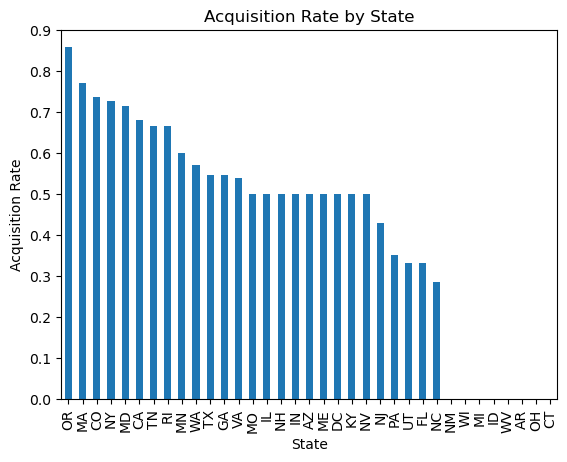

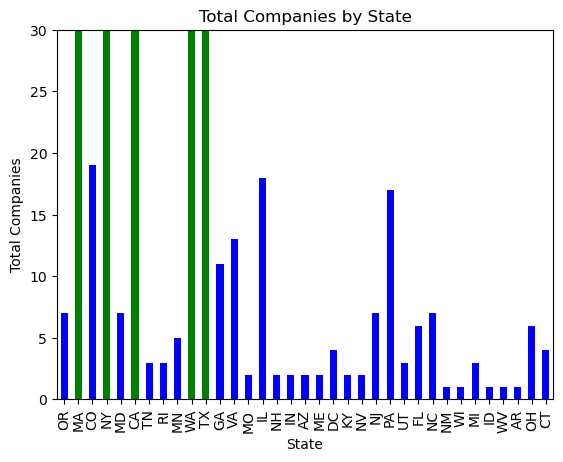

In [ ]:
loc_acquired = [
    {
        "$project": {
            "state": "$state_code",
            "status": "$status"
        }
    },
    {
        "$group": {
            "_id": {
                "state": "$state"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"acquisition_rate": -1}}
]
data = pd.DataFrame(list(startup_data.aggregate(loc_acquired)))
data = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1)
data["color"] = ["green" if v > 30 else "blue" for v in data["totalCount"]]

data.plot.bar(
    "state",
    "acquisition_rate",
    title="Acquisition Rate by State",
    xlabel="State",
    ylabel="Acquisition Rate",
    legend=[]
)
data.plot.bar(
    "state",
    "totalCount",
    color=data["color"],
    ylim=[0,30],
    title="Total Companies by State",
    xlabel="State",
    ylabel="Total Companies",
    legend=[]
)

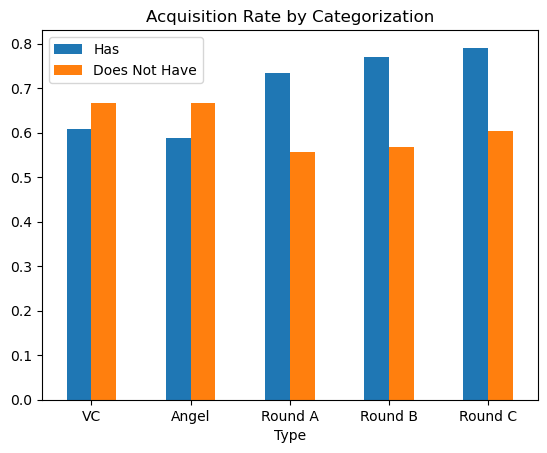

In [123]:
cols = ["VC", "angel", "roundA", "roundB", "roundC"]
things = [[
    {
        "$project": {
            f"{col}": f"$has_{col}",
            "status": "$status"
        }
    },
    {
        "$group": {
            "_id": {
                f"{col}": f"${col}"
            },
            "totalCount": {"$sum": 1},
            "acquiredCount": {
                "$sum": {"$cond": [{"$eq": ["$status", "acquired"]}, 1, 0]}
            }
        }
    },
    {
        "$addFields": {
            "acquisition_rate": {"$divide": ["$acquiredCount", "$totalCount"]}
        }
    },
    {"$sort": {"acquisition_rate": -1}}
] for col in cols]

datas = [pd.DataFrame(list(startup_data.aggregate(thing))) for thing in things]

for i, data in enumerate(datas):
    datas[i] = pd.concat([data.drop(columns="_id"), data["_id"].apply(pd.Series)], axis=1).sort_values(by=cols[i]).set_index(cols[i])

final = pd.DataFrame(
    {
        "Type": ["VC", "Angel", "Round A", "Round B", "Round C"],
        "Has": [v.loc[1]["acquisition_rate"] for v in datas],
        "Does Not Have": [v.loc[0]["acquisition_rate"] for v in datas]
    }
).set_index("Type")

final.plot.bar(title="Acquisition Rate by Categorization").tick_params(axis="x", labelrotation=0)